In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("white")


In [2]:
import plotly.express as px

In [49]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [50]:
df_train = data_train.copy()
df_test = data_test.copy()

# Analyse de forme

In [51]:
print(f"shape train : {df_train.shape}\n shape test : {df_test.shape}")
df_train.head()

shape train : (3116945, 22)
 shape test : (2077964, 21)


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [52]:
df_train.dtypes.value_counts()

object     18
float64     3
int64       1
Name: count, dtype: int64

In [53]:
(df_test.isna().sum()/df_test.shape[0]).sort_values(ascending=False)

veil-type               9.487869e-01
spore-print-color       9.141722e-01
stem-root               8.845254e-01
veil-color              8.788044e-01
stem-surface            6.359533e-01
gill-spacing            4.040469e-01
cap-surface             2.150682e-01
gill-attachment         1.683480e-01
ring-type               4.148051e-02
gill-color              2.358077e-05
cap-shape               1.491845e-05
habitat                 1.203101e-05
stem-color              1.010605e-05
has-ring                9.143566e-06
cap-color               6.256124e-06
does-bruise-or-bleed    4.812403e-06
cap-diameter            3.368682e-06
stem-height             4.812403e-07
id                      0.000000e+00
stem-width              0.000000e+00
season                  0.000000e+00
dtype: float64

# Analyse du fond
### Visualisation et élimination des colonnes inutiles

In [54]:
df_test.drop(columns='id', inplace=True)  # La colonne id n'a pas d'interêt dans le test set, pas d'influence sur la toxicité


<Axes: >

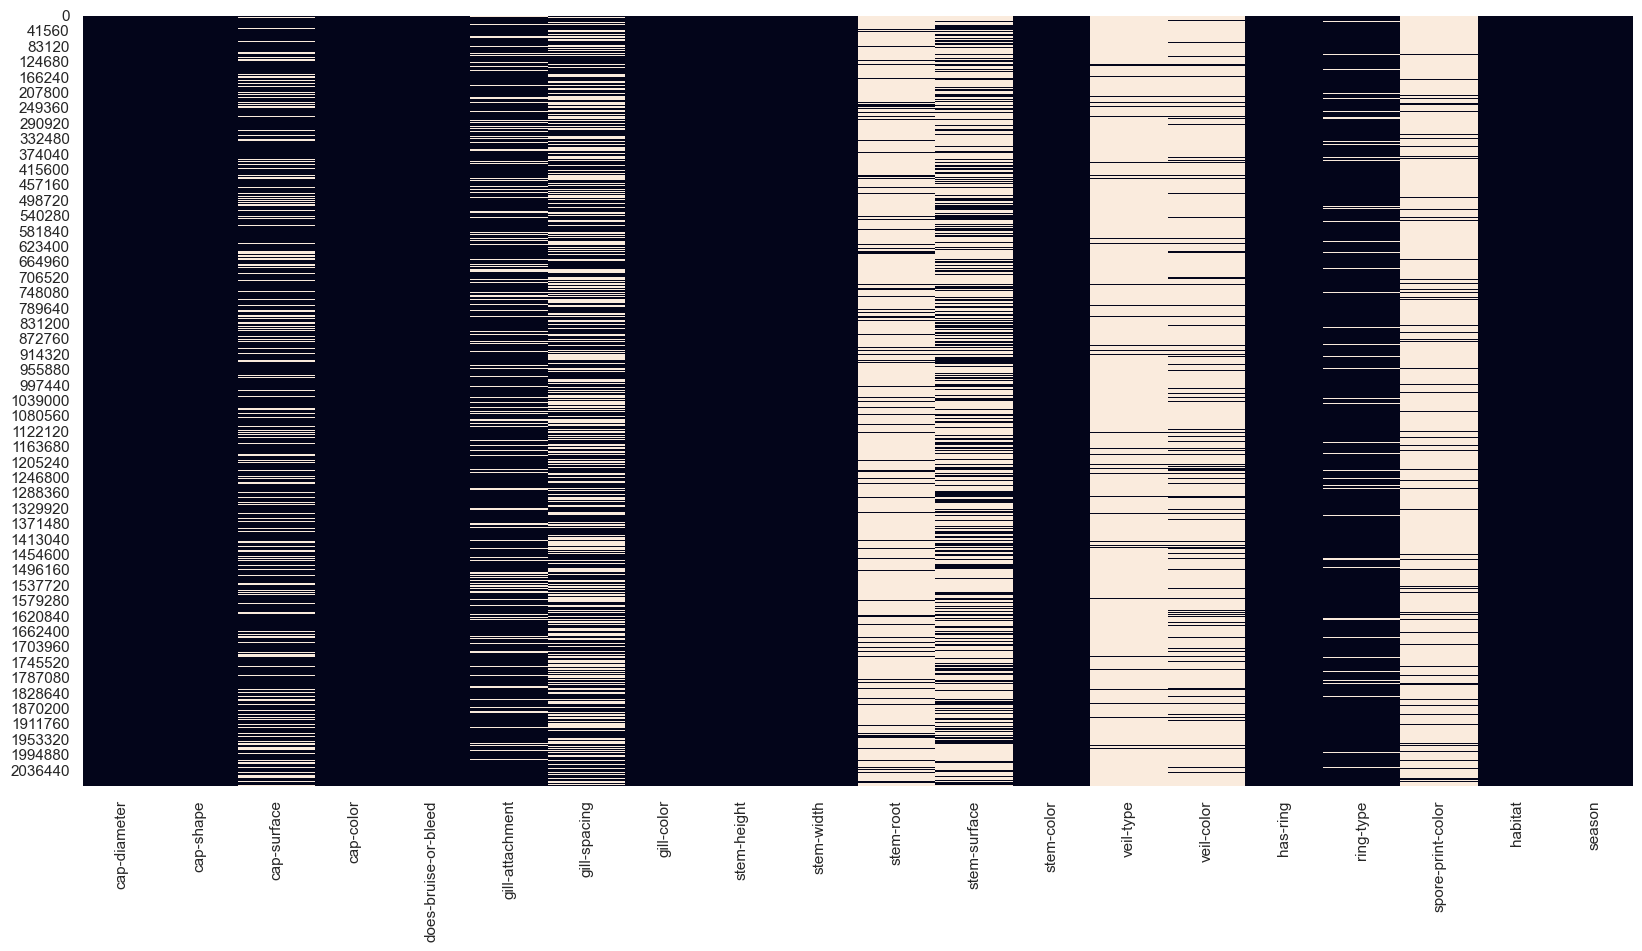

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(df_test.isna(), cbar=False)

Des valeurs manquantes, certianes pourraient être déduites, à tester

In [56]:
df_train.dtypes.value_counts()

object     18
float64     3
int64       1
Name: count, dtype: int64

### Analyse de la colonne target

In [57]:
df_train["class"].value_counts(normalize=True)

class
p    0.547137
e    0.452863
Name: proportion, dtype: float64

La répartition toxique / non toxique est proche

### Variables continues

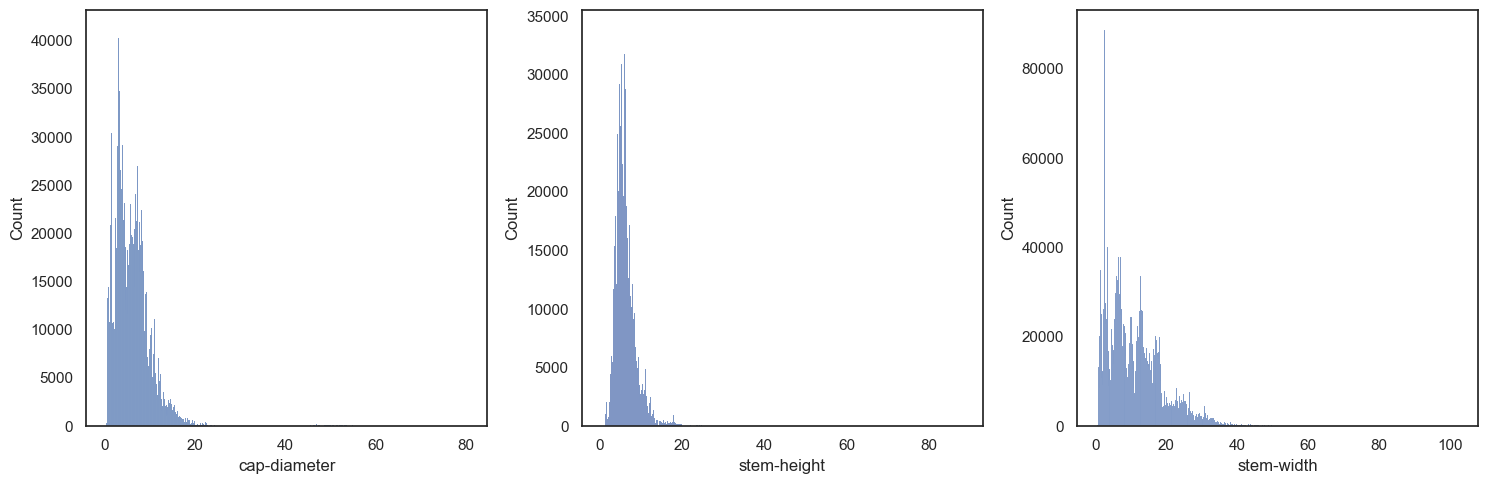

In [58]:
i=1
plt.figure(figsize=(20,5))
for col in df_train.select_dtypes(include=['float']).columns:
    plt.subplot(1, 4, i)
    sns.histplot(data=df_train[col],)
    plt.tight_layout()
    i +=1

### Variables qualitatives

In [65]:
for col in df_train.select_dtypes(include='object'):
    print(f"{col :-<40} {df_train[col].unique()}")
df_train.select_dtypes(include='object')

class----------------------------------- ['e' 'p']
cap-shape------------------------------- ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06']
cap-surface----------------------------- ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'
 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does h'
 '1.42' 'class' 'has h' 'does None' '10.83' 'season' '8.96' '14.04' '5.73'
 'is None' '24.38' '2.81' '0.88' '2.1

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,f,s,u,f,a,c,w,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,x,h,o,f,a,c,n,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,f,s,b,f,x,c,w,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,f,y,g,f,s,NaN,g,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,x,l,w,f,d,NaN,w,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,f,NaN,n,t,NaN,NaN,w,b,NaN,w,u,w,t,g,NaN,d,u
3116941,e,s,NaN,w,t,d,c,p,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,p,x,e,e,f,a,NaN,w,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,e,p,i,n,t,e,NaN,p,NaN,y,w,NaN,NaN,t,p,NaN,d,u


_ATTENTION : IL Y A DES VALEURS NUMERIQUES ET ALPHABETIQUES MELANGEES (ex : des nombres en str dans grill-color)_

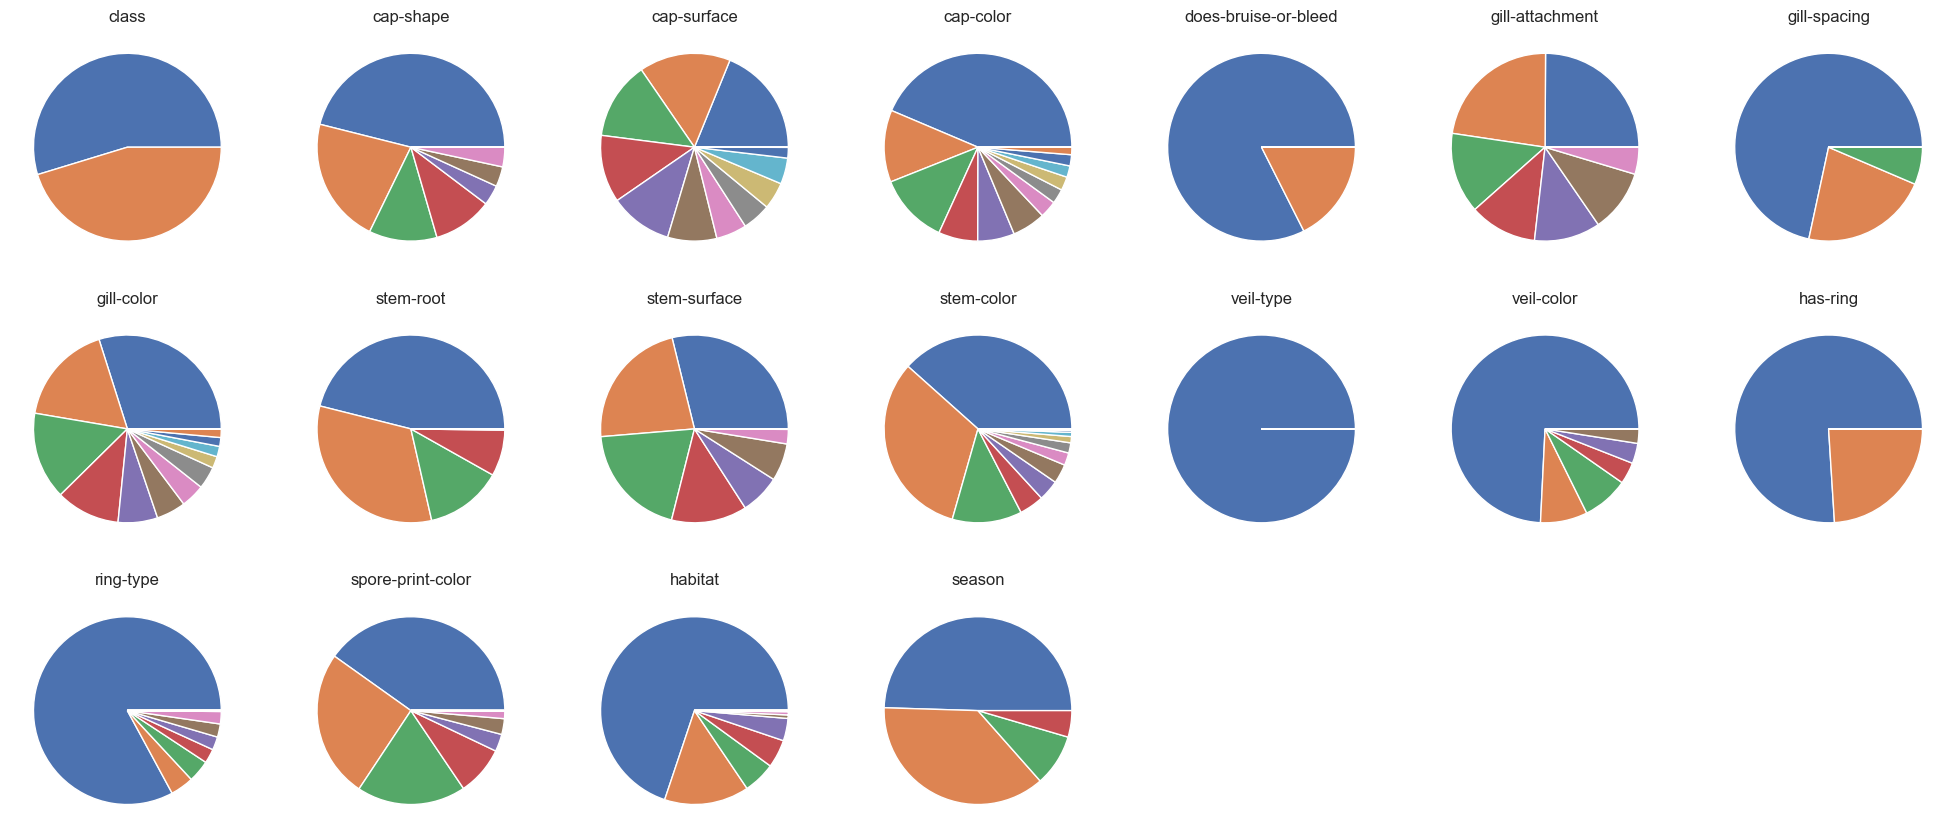

In [64]:
i=1
plt.figure(figsize=(25,25))
for col in df_train.select_dtypes(include='object'):
    plt.subplot(7,7,i)
    plt.pie(df_train[col].value_counts())
    plt.title(f"{col}",)
    i += 1


In [78]:
variable_df = pd.read_csv('mushroom_variables.csv')
variable_df = variable_df.transpose().reset_index()
variable_df.columns = variable_df[0]

ValueError: Length mismatch: Expected axis has 23 elements, new values have 8 elements

In [ ]:
df = pd.merge(df_train, variable_df, on)